# This file was made in Google Colab

In [1]:
cd drive/MyDrive/Klarna

/content/drive/MyDrive/Klarna


In [ ]:
pwd

'/content/drive/MyDrive/Klarna'

In [2]:
import os
import pandas as pd
df = pd.read_csv('dataset.csv',  sep=';')



In [20]:
train = df[~df['default'].isna()]
data = train.copy(deep=True)

In [21]:
categorical_columns = [

'account_status',
'account_worst_status_0_3m',
'account_worst_status_12_24m',
'account_worst_status_3_6m',
'account_worst_status_6_12m',
'merchant_category',
'merchant_group',
'name_in_email',
'status_last_archived_0_24m', 
'status_2nd_last_archived_0_24m', 
'status_3rd_last_archived_0_24m', 
'status_max_archived_0_6_months', 
'status_max_archived_0_12_months', 
'status_max_archived_0_24_months',
'worst_status_active_inv' ]

Columns_with_NaNs = [
'worst_status_active_inv',
'num_arch_written_off_12_24m',
'num_arch_written_off_0_12m',
'num_active_div_by_paid_inv_0_12m',
'avg_payment_span_0_3m',
'avg_payment_span_0_12m',
'account_worst_status_6_12m',
'account_worst_status_3_6m',
'account_worst_status_12_24m',
'account_worst_status_0_3m',
'account_status',
'account_incoming_debt_vs_paid_0_24m',
'account_days_in_term_12_24m',
'account_days_in_rem_12_24m',
'account_days_in_dc_12_24m'
]

cat_cols_that_have_Nans = set(categorical_columns).intersection( set(Columns_with_NaNs))
cat_cols_that_have_Nans = list(cat_cols_that_have_Nans)
print(cat_cols_that_have_Nans)
data[cat_cols_that_have_Nans] = data.loc[:,cat_cols_that_have_Nans].fillna(value=1.0)

other_cols = set(Columns_with_NaNs) - set(cat_cols_that_have_Nans)
other_cols = list(other_cols)

cols_to_impute_by_mode = ['account_days_in_dc_12_24m',
                        'account_days_in_rem_12_24m',
                        'num_arch_written_off_12_24m',
                        'account_days_in_term_12_24m',
                        'num_arch_written_off_0_12m']
data[cols_to_impute_by_mode] = data.loc[:,cols_to_impute_by_mode].fillna(value=0.0)


numerical_cols_left = set(other_cols) - set(cols_to_impute_by_mode)

for col in numerical_cols_left:
    data[col] = data.loc[:,col].fillna(value=data[col].mean())





  
cols_for_Label_encoding = []
cols_for_one_hot_encoding = []

for col in categorical_columns:
    if len(data[col].unique()) > 5:
        cols_for_one_hot_encoding.append(col)
    else:
        cols_for_Label_encoding.append(col)

['worst_status_active_inv', 'account_worst_status_0_3m', 'account_worst_status_3_6m', 'account_worst_status_6_12m', 'account_status', 'account_worst_status_12_24m']


In [5]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
X_train = data.copy(deep=True)

In [6]:
# X_train.drop(columns= categorical_columns, inplace=True)

In [12]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for feat in cols_for_Label_encoding:
#     data[feat] = le.fit_transform(data[feat].astype(str))

In [13]:
# X_train = pd.get_dummies(data, columns=cols_for_one_hot_encoding )

In [14]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for feat in cols_for_Label_encoding:
#     X_train[feat] = le.fit_transform(X_train[feat].astype(str))

In [24]:
dummy = pd.get_dummies(X_train, columns = categorical_columns)


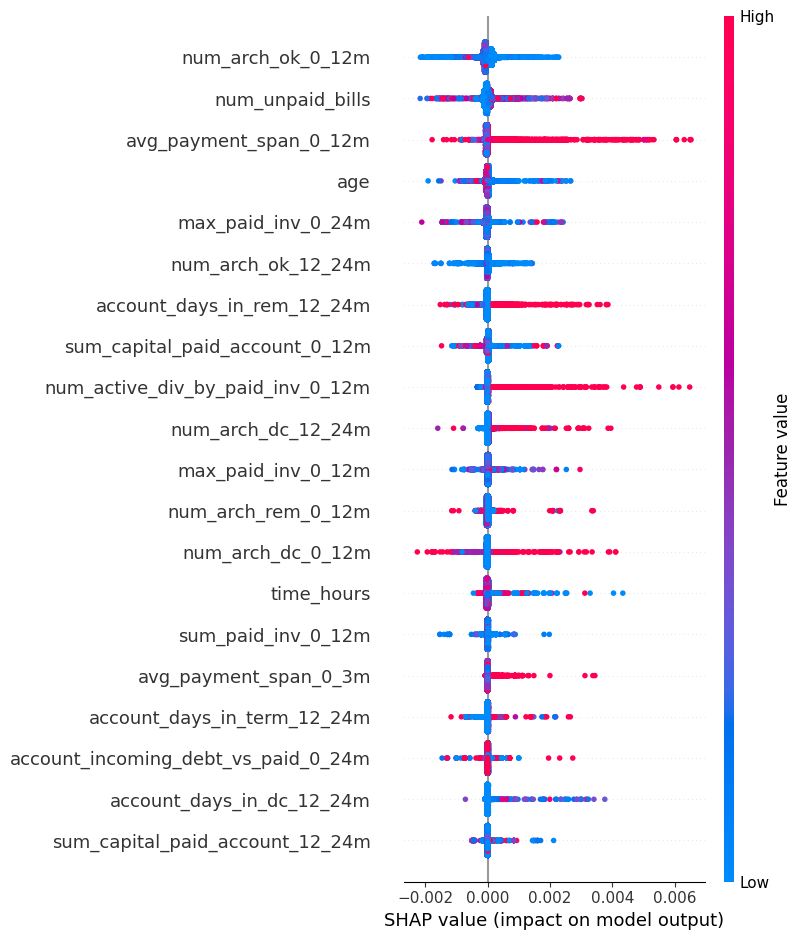

In [18]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

X = X_train

# X.drop(['default'], inplace=True, axis=1)
y = data['default']

X.drop(['uuid'], inplace=True, axis=1)

model = XGBRegressor(n_estimators=10, max_depth=10, learning_rate=0.001)
# Fit the Model
model.fit(X, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

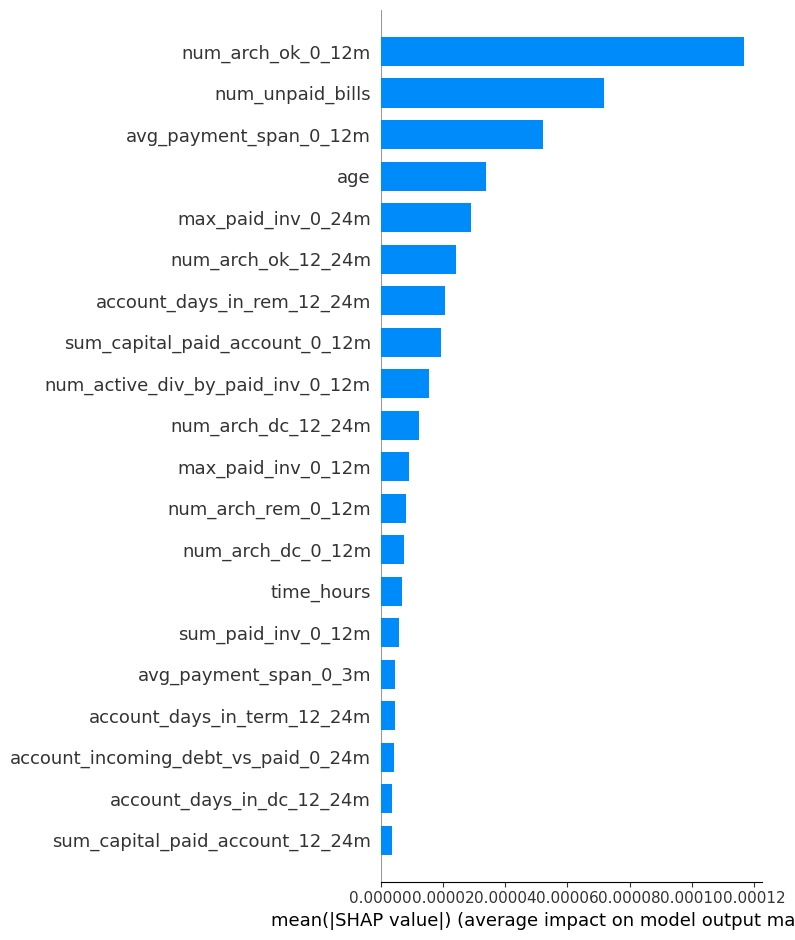

In [20]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')